<a href="https://colab.research.google.com/github/RudiksChess/AstronomiaParcial2/blob/master/Astronom%C3%ADaParcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidad del Valle de Guatemala**\
**Introducción a la astronomía**\
**Parcial 2**\
**Dra. Kristhell López**

Integrantes:
1. Rudik Roberto Rompich – Carné 19857
2. Baptiste Henri Bauer – Carné 171501

Paquetes:

In [ ]:
import numpy as np 
import scipy 
import matplotlib as plt
import sympy as sp

### **Problema 1** 

$Tercera$ $ley$ $de$ $Kepler$\
La ecuación dada es la siguiente: 

$$mr\omega^2 = G\frac{mM}{r^2}$$

$$mr\left(\frac{2\pi}{T}\right)^2 = G\frac{mM}{r^2} \rightarrow T^2 = \left(\frac{4\pi^2}{GM} \right)r^3 \rightarrow  T^2 \propto r^3$$
$$\frac{a^3}{T^2} = \frac{G(M + m)}{4\pi^2} $$

Despejando para M 

$$ M = \frac{a^{3}4\pi^2}{T^{2}G} - m$$

$Movimiento$ $circular$ $uniforme$\
La ecuación dada es la siguiente: 

$$ F_{gravedad} = F_{centrípeda}$$
$$G\frac{Mm}{r^2} = \frac{mv^2}{r}$$

Despejando para M:


$$ M = \frac{v^2 r}{G}$$

En ambos casos: \
$M$ es la masa del sol.\
$m$ es la masa del planeta.\
$T$ es el período orbitanl.\
$a$ es el semieje mayor elíptico.\
$r$ es el radio del planeta. \
$G$ constante universal de gravitación.\
$v$ velocidad centrípeta del planeta alrededor del sol.
 

 

In [ ]:
datos = np.array([["Planeta","Eje semimayor (AU)","Período (días)","Masa (Kg)","R(km)", "V. Orbital (km/s)"],
                 ["Mercurio","0.38710","87.9693","3.301E23","57.9","47.4"],
                 ["Venus","0.72333","224.7008","4.867E24","108.2","35.0"],
                 ["Tierra","1","365.2564","5.972E24","149.6","29.8"],
                 ["Marte","1.52366","686.9796","6.417E23","227.9","24.1"],
                 ["Jupiter","5.20336","4332.8201","1.899E27","778.6","13.1"],
                 ["Saturno","9.53707","10775.599","5.685E26","1433.5","9.7"],
                 ["Urano","19.1913","30687.153","8.682E25","2872.5","6.8"],
                 ["Neptuno","30.0690","60190.03","1.024E26","4495.1","5.4"]])

def masa_kepler(planeta):
    "Las variables utilizadas están descritas en la dedución anteriormente hecha"
    a=float(planeta[1])*1.496E11
    t=float(planeta[2])*86400
    m=float(planeta[3])
    G = 6.674E-11  # m³kg⁻¹s⁻²
    masa= (((a**3)*4*(np.pi)**2)/((t**2)*G)) - m
    return masa

def masa_mcu(planeta):
    "Las variables utilizadas están descritas en la dedución anteriormente hecha"
    G = 6.674E-11  # m³kg⁻¹s⁻²
    v = float(planeta[5])*1E3
    r = float(planeta[4])*1E9
    masaMCU = ((v**2)*r)/G
    return masaMCU

def masa_del_sol(planeta):
    #Se ingresa el planeta que se quiere analizar.
    #La variable planeta se ingresa en el array de datos buscando la colunma indicada de la variable "datos".

    planeta_analizado= datos[planeta]
    #Se evalúa de las dos formas en las funciones anteriores
    fkepler = masa_kepler(planeta_analizado)
    fmcu = masa_mcu(planeta_analizado)
    planeta = datos[planeta][0]
    return planeta, fkepler, fmcu

*1. Evaluar todos los planetas del sistema solar (rocosos y gaseosos)*

In [ ]:
print("Planetas rocosos\n")
for i in range (1,5):
    planeta, kep_calculo, mcu_calculo = masa_del_sol(i)
    print(f"({i}) La masa solar basado en el planeta: {planeta} \n"
          f"Kepler: {kep_calculo}\n"
          f"MCU: {mcu_calculo}\n")    
print("Planetas gaseosos\n")
for i in range (5,9):
    planeta, kep_calculo, mcu_calculo = masa_del_sol(i)
    print(f"({i}) La masa solar basado en el planeta: {planeta} \n"
          f"Kepler: {kep_calculo}\n"
          f"MCU: {mcu_calculo}\n")

Planetas rocosos

(1) La masa solar basado en el planeta: Mercurio 
Kepler: 1.9886025847318315e+30
MCU: 1.9491669763260416e+30

(2) La masa solar basado en el planeta: Venus 
Kepler: 1.9885657868017523e+30
MCU: 1.9859904105483968e+30

(3) La masa solar basado en el planeta: Tierra 
Kepler: 1.9885836166527088e+30
MCU: 1.9905721306562783e+30

(4) La masa solar basado en el planeta: Marte 
Kepler: 1.9884615944220647e+30
MCU: 1.9833173359304768e+30

Planetas gaseosos

(5) La masa solar basado en el planeta: Jupiter 
Kepler: 1.989008751333163e+30
MCU: 2.0020309559484566e+30

(6) La masa solar basado en el planeta: Saturno 
Kepler: 1.9814280684378886e+30
MCU: 2.020947183098592e+30

(7) La masa solar basado en el planeta: Urano 
Kepler: 1.9912320812033414e+30
MCU: 1.990176805513935e+30

(8) La masa solar basado en el planeta: Neptuno 
Kepler: 1.9907940201279014e+30
MCU: 1.9639963440215764e+30



*2. Determinar cuál método da los valores superiores*

In [ ]:
suma_kepler = []
suma_mcu = []
for i in range (1,9):
  planeta, kep_calculo, mcu_calculo = masa_del_sol(i)
  suma_kepler.append(kep_calculo)
  suma_mcu.append(kep_calculo)

print(f"La media de la tercera ley de Kepler es: {np.mean(suma_kepler)} y la media de MCU es: {np.mean(suma_mcu)}.\n" 
        "Por lo tanto, no existe una diferencia aparente al evaluar todos los planetas del sistema solar con los dos métodos.")


  

La media de la tercera ley de Kepler es: 1.9883345629638315e+30 y la media de MCU es: 1.9883345629638315e+30.
Por lo tanto no existe una diferencia aparente al evaluar todos los planetas del sistema solar con los dos métodos.


*3. Mayor desviación con la masa estándar del sol* \
y
*4. Método que da mayor porcentaje de error*

In [ ]:
masa_estandar_del_sol= 1.98847E30
for i in range (1,9):
  planeta, kep_calculo, mcu_calculo = masa_del_sol(i)
  #Formula del porcentaje de error (experimental-teórica)/(teórica) *100
  desviacion_kepler= (kep_calculo-masa_estandar_del_sol)/(masa_estandar_del_sol)*100
  desviacion_mcu= (mcu_calculo-masa_estandar_del_sol)/(masa_estandar_del_sol)*100

  print(f"Desviación planeta: {planeta}\n"
        f"Con Kepler: {np.round(np.abs(desviacion_kepler),3)}%\n"
        f"Con MCU: {np.round(np.abs(desviacion_mcu),3)}%\n")

print("Con las leyes de Kepler Urano es quien da un mayor porcentaje de error, aunque no tan significativo.\n"
      "Sin embargo, con MCU, Mercurio da un porcentaje de error de casi el 2%. Este es un error no tan grande, pero sí bastante significativo \n"
      "a la hora de hacer cálculos. Esto es posible asociarlo al problema que mercurio representó históricamente hasta que Einstein lo explicó\n"
      "con su teoría de relatividad general. Diciendo que se debía al desplazamiento del perihelio.\n"
      "Por otro lado, se hace evidente que el método de MCU da una desviación mucho más grande. Esto se puede explicar, ya que la idea del\n"
      "MCU es un precursor de las leyes de Kepler; el cual utiliza un método con menos parámetros para explicar el movimiento de los astros.")

Desviación planeta: Mercurio
Con Kepler: 0.007%
Con MCU: 1.977%

Desviación planeta: Venus
Con Kepler: 0.005%
Con MCU: 0.125%

Desviación planeta: Tierra
Con Kepler: 0.006%
Con MCU: 0.106%

Desviación planeta: Marte
Con Kepler: 0.0%
Con MCU: 0.259%

Desviación planeta: Jupiter
Con Kepler: 0.027%
Con MCU: 0.682%

Desviación planeta: Saturno
Con Kepler: 0.354%
Con MCU: 1.633%

Desviación planeta: Urano
Con Kepler: 0.139%
Con MCU: 0.086%

Desviación planeta: Neptuno
Con Kepler: 0.117%
Con MCU: 1.231%

Con las leyes de Kepler Urano es quien da un mayor porcentaje de error, aunque no tan significativo.
Sin embargo, con MCU, Mercurio da un porcentaje de error de casi el 2%. Este es un error no tan grande, pero sí bastante significativo 
a la hora de hacer cálculos. Esto es posible asociarlo al problema que mercurio representó históricamente hasta que Einstein lo explicó
 con su teoría de relatividad general. Diciendo que se debía al desplazamiento del perihelio.
Por otro lado, se hace eviden

### **Problema 2**

Primer inciso:

$$F=ma=\frac{GMm}{r²}$$

Ya que $a=g$, al simplificar:

$$g=\frac{GM}{r²}$$

Se calculan los valores de la gravedad en los polos y en el ecuador utilizando esta fórmula.

In [ ]:
Mt=5.972*10**(24) #kg
G=6.674*10**(-11) #m³kg⁻¹s⁻²

g_polo = G*Mt/((6.3568*10**6)**2)
g_ecuador = G*Mt/((6.3781*10**6)**2)
## Se utilizó el valor de 5.972*10**(24) kg para la masa de la Tierra (no estandarizada en el parcial).

print("El valor de g en el polo, con un radio de R = 6.3568*10^6, es "+str(g_polo)+".")
print("El valor de g en el ecuador, con un radio de R = 6.3781*10^6, es "+str(g_ecuador)+".")

El valor de g en el polo, con un radio de R = 6.3568*10^6, es 9.863451330079851.
El valor de g en el ecuador, con un radio de R = 6.3781*10^6, es 9.79768230560293.


Segundo inciso:

$$R(\phi)=\left(\frac{(a^2\cos(\phi))^2+(b^2\sin(\phi))^2}{(a\cos(\phi))^2+(b\sin(\phi))^2}\right)^{\frac{1}{2}}$$

Ya que $g=\frac{GM}{r²}$, sustituimos $g(\phi)=\frac{GM}{R^{2}(\phi)}$

$$\Rightarrow g(\phi)=\frac{GM}{\left(\frac{(a^2\cos(\phi))^2+(b^2\sin(\phi))^2}{(a\cos(\phi))^2+(b\sin(\phi))^2}\right)}$$

$$\Rightarrow g(\phi)= \frac{GM((a\cos(\phi))^2+(b\sin(\phi))^2)}{(a^2\cos(\phi))^2+(b^2\sin(\phi))^2}$$

Graficamos:

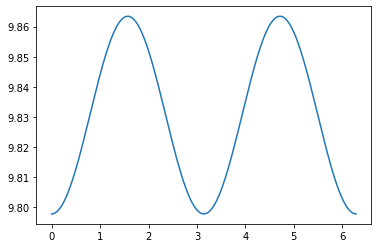

In [ ]:
#Importamos a pylab
import pylab as pb #Importamos a pylab.

#Definimos variables para el valor del radio de la Tierra
b=6.3568*10**6 #En los polos
a=6.3781*10**6 #En el ecuador

#Definimos nuestro espacio de trabajo. Con pylab es fácil trabajar con un linspace.
x=pb.linspace(0,2*pb.pi,1000) #Va de 0 a 2π, una revolución completa alrededor del planeta. x=φ
COS=pb.cos(x) #Por más comodidad, definimos aquí el coseno de este linspace.

try1=((a**(2)*COS)**(2)+(b**(2)*pb.sin(x))**(2)) #Numerador
#pb.plot(x,try1)
try2=((a*COS)**2+(b*pb.sin(x))**(2)) #Denominador
#pb.plot(x,try2)

d=try1/try2 #División
#Rphi=pb.sqrt(d) #La raíz de eso es R(φ), pero necesitamos su cuadrado.
gphi=G*Mt/d #g(φ) es R²=d.

pb.plot(x,gphi) #Mostramos la gráfica.

En radianes, $14.6º ≈ 0.229 rad$. 

[0.         0.00628947 0.01257895 0.01886842 0.0251579  0.03144737
 0.03773685 0.04402632 0.0503158  0.05660527 0.06289475 0.06918422
 0.0754737  0.08176317 0.08805265 0.09434212 0.1006316  0.10692107
 0.11321055 0.11950002 0.1257895  0.13207897 0.13836845 0.14465792
 0.15094739 0.15723687 0.16352634 0.16981582 0.17610529 0.18239477
 0.18868424 0.19497372 0.20126319 0.20755267 0.21384214 0.22013162
 0.22642109 0.23271057 0.23900004 0.24528952 0.25157899 0.25786847
 0.26415794 0.27044742 0.27673689 0.28302637 0.28931584 0.29560531
 0.30189479 0.30818426 0.31447374 0.32076321 0.32705269 0.33334216
 0.33963164 0.34592111 0.35221059 0.35850006 0.36478954 0.37107901
 0.37736849 0.38365796 0.38994744 0.39623691 0.40252639 0.40881586
 0.41510534 0.42139481 0.42768429 0.43397376 0.44026323 0.44655271
 0.45284218 0.45913166 0.46542113 0.47171061 0.47800008 0.48428956
 0.49057903 0.49686851 0.50315798 0.50944746 0.51573693 0.52202641
 0.52831588 0.53460536 0.54089483 0.54718431 0.55347378 0.5597

Problema 3

In [ ]:
a-b


21300.0

Problema 4

Problema 5